# General Analysis into Online Retail Orders

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn import metrics
from matplotlib import pyplot
import jupytab

Data source: https://www.kaggle.com/rupakroy/online-retail?select=Online_Retail.csv

## Executive Summary

This analysis is based on a public data set from an anonymous online retailer in UK, which contains order transactions from 2010 to 2011. Due to the limited number of attributes, we only performed basic statistical analysis and applied association rules to discover business insights for this online retailer. Some key findings are:

**Best Seller Top 5:**

| Quantity | Revenue | # of Customer |
|  :----:  | :----:  |  :----:  |
| POPCORN HOLDER | REGENCY CAKESTAND 3 TIER | REGENCY CAKESTAND 3 TIER |
| WORLD WAR 2 GLIDERS ASSTD DESIGNS | PARTY BUNTING | WHITE HANGING HEART T-LIGHT HOLDER |
| JUMBO BAG RED RETROSPOT | WHITE HANGING HEART T-LIGHT HOLDER | PARTY BUNTING |
| WHITE HANGING HEART T-LIGHT HOLDER | JUMBO BAG RED RETROSPOT | ASSORTED COLOUR BIRD ORNAMENT |
| ASSORTED COLOUR BIRD ORNAMENT | RABBIT NIGHT LIGHT | SET OF 3 CAKE TINS PANTRY DESIGN |

**Most Returned Top 5:**

| Quantity | Revenue | # of Customer |
|  :----:  | :----:  |  :----:  |
| TRAVEL CARD WALLET I LOVE LONDON | REGENCY CAKESTAND 3 TIER | REGENCY CAKESTAND 3 TIER
| ROTATING SILVER ANGELS T-LIGHT HLDR | WHITE HANGING HEART T-LIGHT HOLDER | JAM MAKING SET WITH JARS
| TRAVEL CARD WALLET VINTAGE ROSE | FAIRY CAKE FLANNEL ASSORTED COLOUR | SET OF 3 CAKE TINS PANTRY DESIGN
| POPART WOODEN PENCILS ASST | PANTRY CHOPPING BOARD | ROSES REGENCY TEACUP AND SAUCER
| JUMBO BAG OWLS | DOORMAT FAIRY CAKE | RECIPE BOX PANTRY YELLOW DESIGN

**Monthly Revenue in 2011:**

| Month | Revenue | Month | Revenue |
| :----:| :----:  | :----:| :----:  |
| 11 | 1,130,664.25 | 07 |    586,802.53
| 10 | 971,686.47 | 03 |    580,281.77
| 09 |   930,599.00 | 01 |    477,906.80
| 05 |   656,939.37 | 02 |    437,987.20
| 06 |    646,884.59 | 04 |    423,624.71
| 08 |    618,218.87 | 12 |    342,473.61

**Top 5 Countries in Terms of 2011 Revenue:**

| Country | Revenue | 
| :-----: | :-----: |
| United Kingdom | 6339154.98 
| Netherlands | 275982.66 
| EIRE | 243580.83
| Germany | 207066.56
| France | 187147.97

### Visualizations

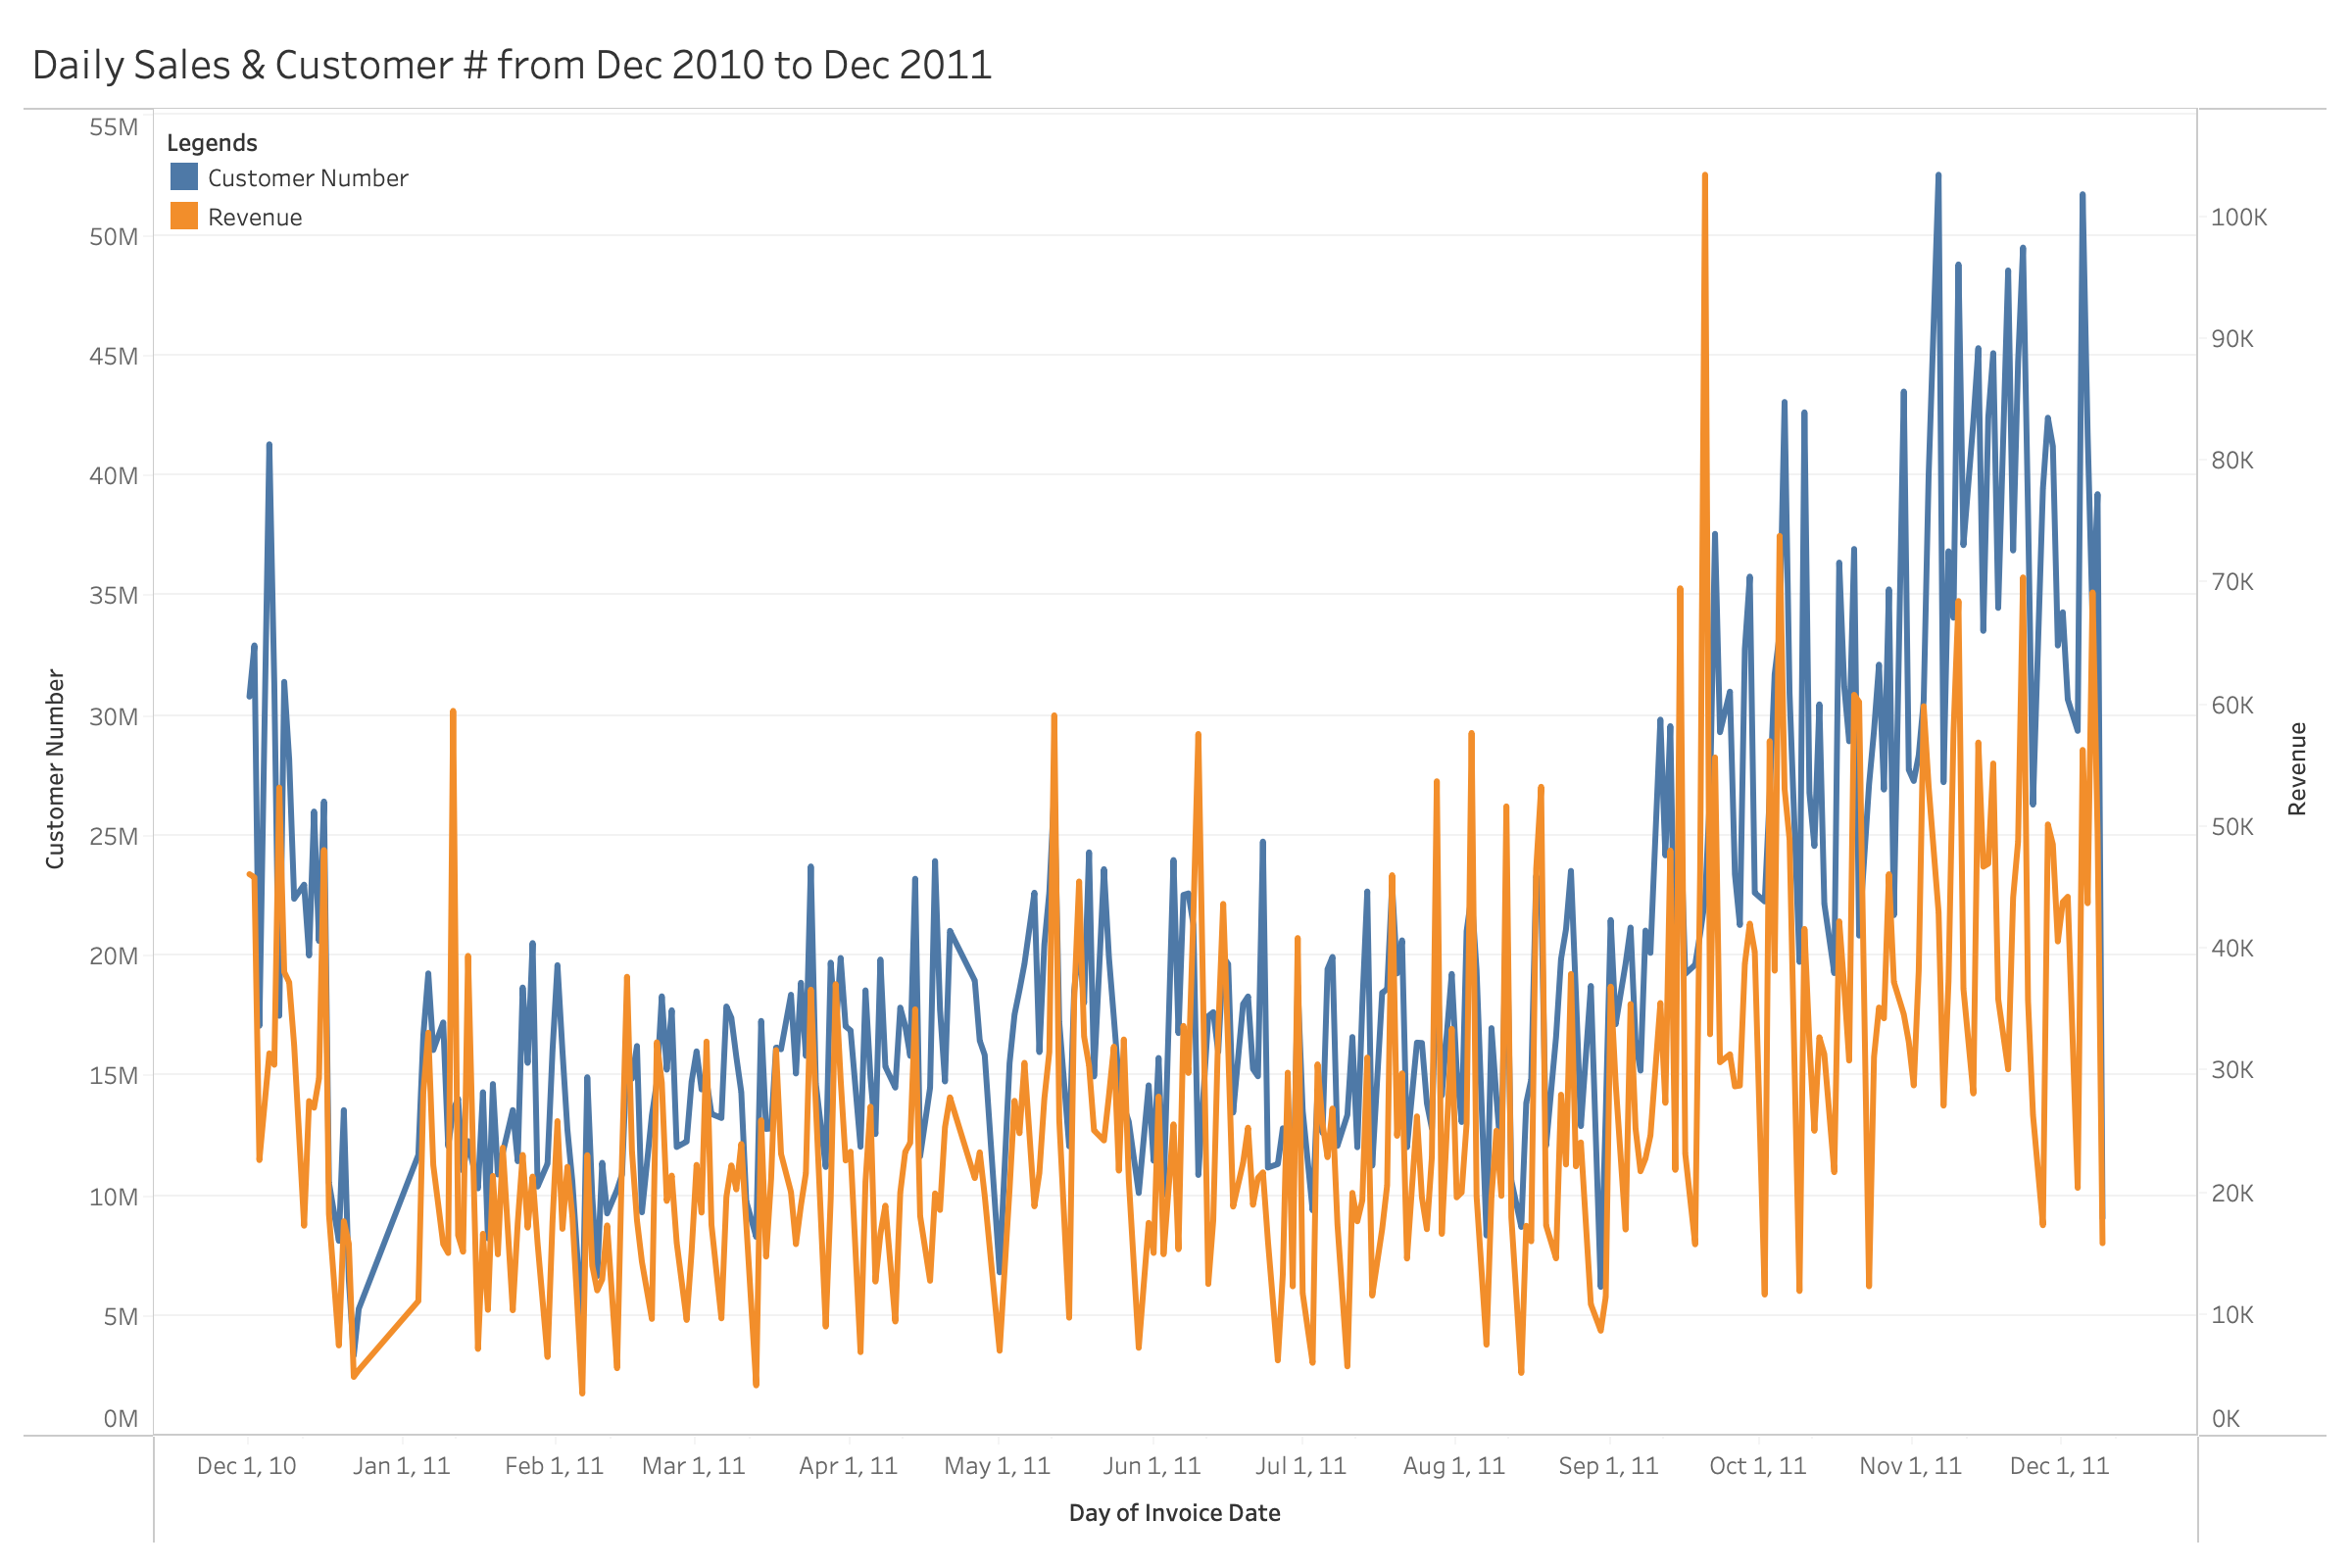

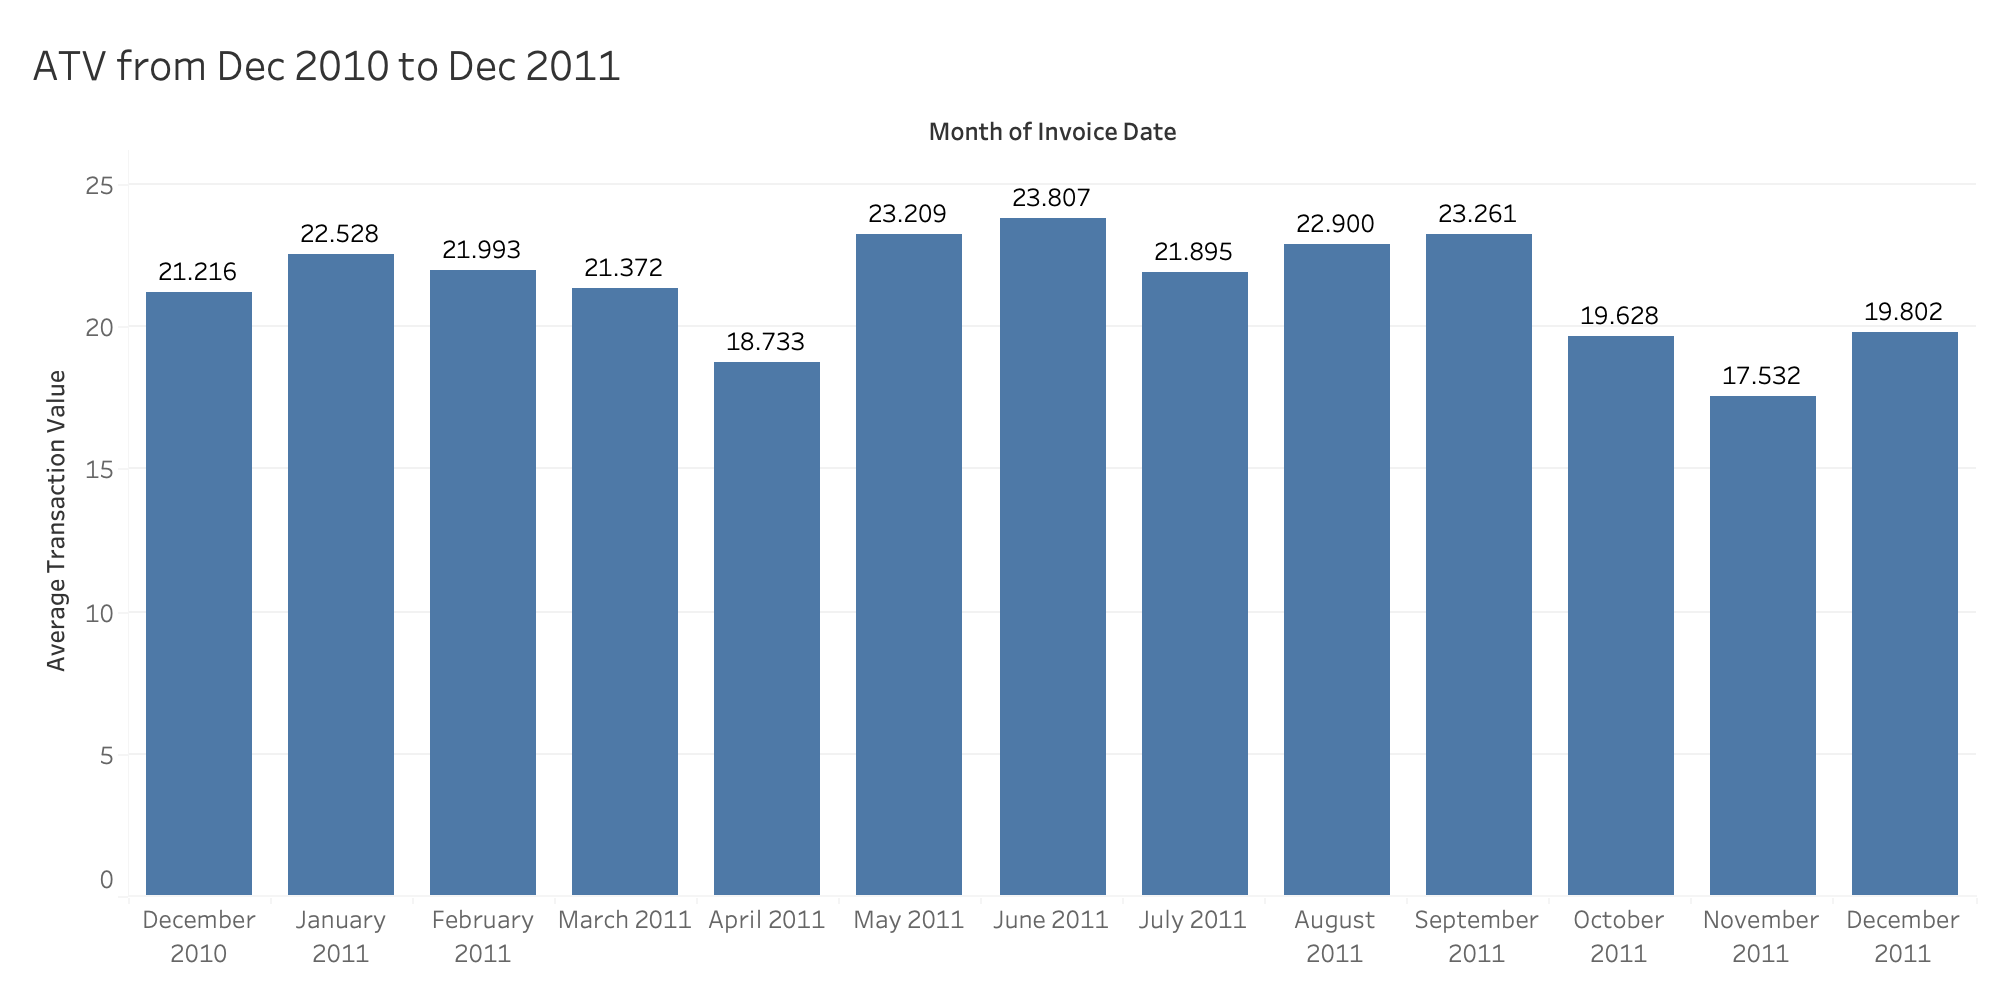

The most interesting part of the descriptive data shown above is the month **November**: highest revenue achieved by largest number of customers but with lowest ATV. It might be ascribed to marketing campaigns and promotions for holiday season.

### Association Rule

In general there are not siginificant evidence of products that are commonly purchased together. Looking into each country, one finding is in France that RED SPOTTY PAPER PLATES and CUPS, PLASTERS IN TIN series were usually purchased together, indicating that **items in one series should be shown in groups and prompted for upsales whenever and wherever possible.**

### Suggestions on operation practice
from data quality perspective:

- Create seperate fields for product name and transaction description
- Try not to change product name too often
- Create another field for transaction category: whether it's regular customer transaction, large 2B order, bank transaction, restock, etc. 
- Find another way to record and report mistakes and errors
- There might be database or information system design problems that prevent employees from complying to SOP, given the fact that there are 572 entries labeled as "MANUAL" with high unit price but no further explanations


<br>


Other examples of data manipulation is shown in the main part of the code.

## Introduction

In [2]:
data_original = pd.read_csv("Online_Retail.csv")
data_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


The data set contains 541,909 rows in 8 columns. 

In [3]:
data_original.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [4]:
data_original.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


## Data Cleaning

### Data type conversion

In [5]:
data_original["CustomerID"] = data_original["CustomerID"].astype(str)

### String format standardization

In [6]:
data_original["Description"] = data_original["Description"].str.upper()
data_original["Description"] = data_original["Description"].str.replace(".", "", regex=False)
data_original["Description"] = data_original["Description"].str.strip()

data_original

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


### Outlier handling

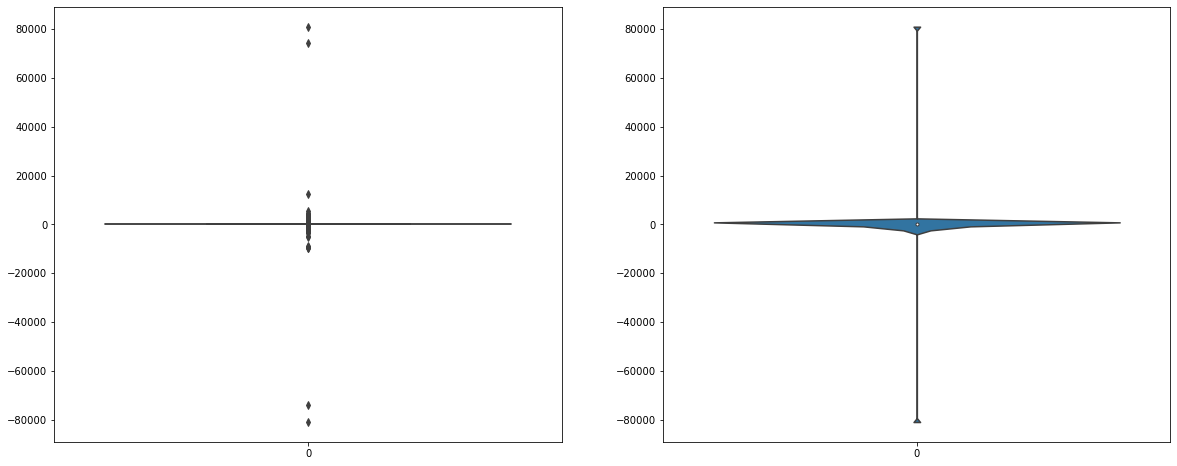

In [7]:
x = data_original["Quantity"]

fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(1, 2, 1)
ax = sns.boxplot(data=x)

ax = fig.add_subplot(1, 2, 2)
ax = sns.violinplot(data=x)

The datapoints in Quantity column distributs in an almost symmetrical way around 0. We don't have the data dictionary or other explanations, but we could guess that the negative values means the returned order.

And for the ones below and above +/-6000, they seem to be misoperation that canceled each other:

In [8]:
data_original[data_original["Quantity"] > 60000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom


In [9]:
data_original[data_original["CustomerID"] == "12346.0"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom


In [10]:
data_original[abs(data_original["Quantity"]) > 60000].groupby(["StockCode"]).sum()

,Quantity,UnitPrice
StockCode,,
23166,0,2.08
23843,0,4.16


So we exclude them first and see what's left:

In [11]:
data_cleaned_1 = data_original[data_original["Quantity"] < 60000]
data_cleaned_1 = data_cleaned_1[data_cleaned_1["Quantity"] > -60000]

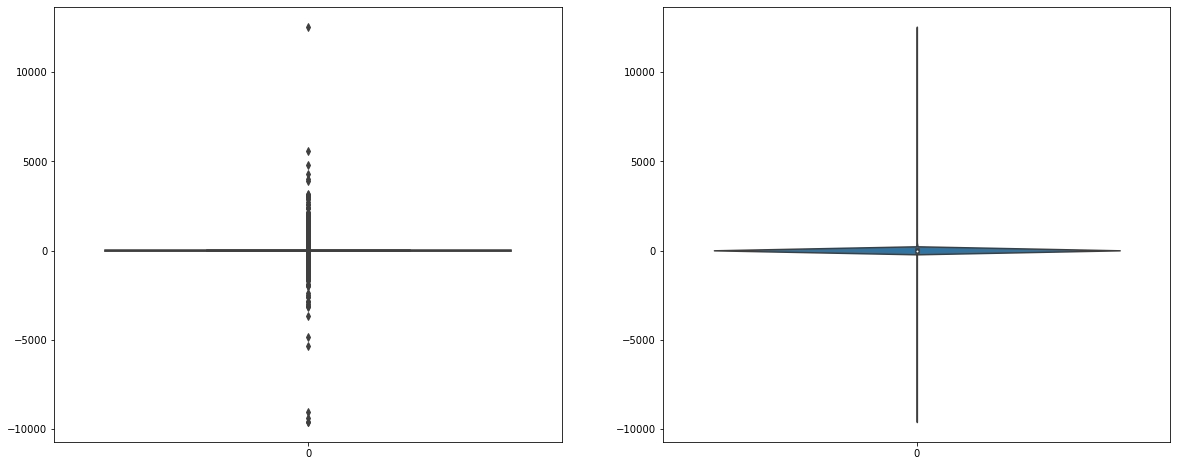

In [12]:
x = data_cleaned_1["Quantity"]

fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(1, 2, 1)
ax = sns.boxplot(data=x)

ax = fig.add_subplot(1, 2, 2)
ax = sns.violinplot(data=x)

In [13]:
data_cleaned_1[data_cleaned_1["Quantity"] > 2000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
4945,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,2010-12-02 17:38:00,0.18,16754.0,United Kingdom
32671,539101,22693,GROW A FLYTRAP OR SUNFLOWER IN TIN,2400,2010-12-16 10:35:00,0.94,16029.0,United Kingdom
52711,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-01-11 12:55:00,2.10,15749.0,United Kingdom
74614,542504,37413,NaN,5568,2011-01-28 12:03:00,0.00,nan,United Kingdom
74615,542505,79063D,NaN,2560,2011-01-28 12:04:00,0.00,nan,United Kingdom
80742,543057,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2592,2011-02-03 10:50:00,0.21,16333.0,United Kingdom
87631,543669,22693,GROW A FLYTRAP OR SUNFLOWER IN TIN,2400,2011-02-11 11:22:00,0.94,16029.0,United Kingdom
91772,544152,18007,ESSENTIAL BALM 35G TIN IN ENVELOPE,2400,2011-02-16 12:10:00,0.06,14609.0,United Kingdom
97432,544612,22053,EMPIRE DESIGN ROSETTE,3906,2011-02-22 10:43:00,0.82,18087.0,United Kingdom
115807,546139,84988,?,3000,2011-03-09 16:35:00,0.00,nan,United Kingdom


Among the orders above 2,000 quantity, we can find some entries without valid customer ID and the unit price is 0. These transactions could indicate something but they are only useful when we have background information and extra data from the company. For now we just exclude the ones with no customer ID and contain 0 value in price.

In [14]:
data_cleaned_2 = data_cleaned_1.loc[(data_cleaned_1["UnitPrice"] != 0) & (data_cleaned_1["CustomerID"] != "nan")]
data_cleaned_2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


Save the orders that has no unit price separately just in case

In [15]:
data_zero = data_cleaned_1[data_cleaned_1["UnitPrice"] == 0]

Then we move forward with UnitPrice column

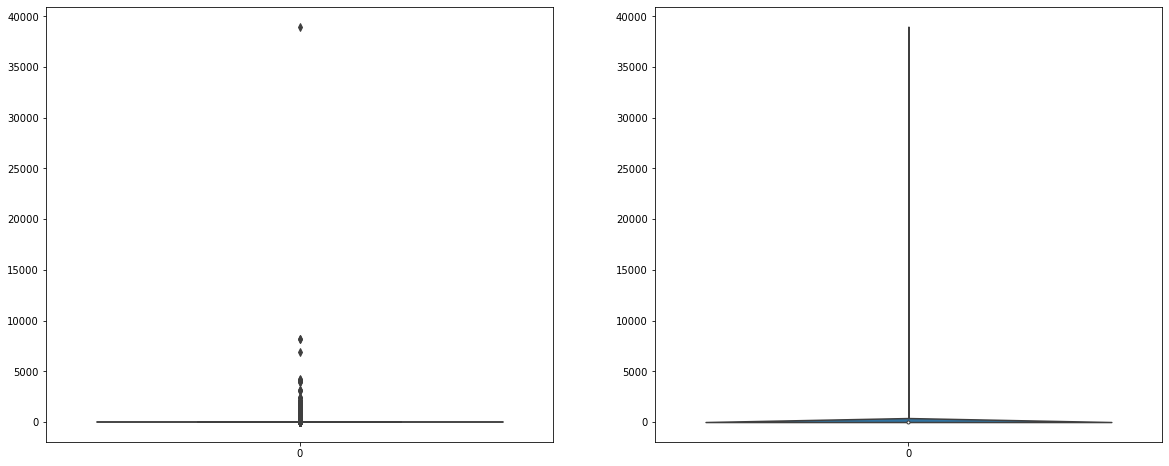

In [16]:
x = data_cleaned_2["UnitPrice"]

fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(1, 2, 1)
ax = sns.boxplot(data=x)

ax = fig.add_subplot(1, 2, 2)
ax = sns.violinplot(data=x)

In [17]:
data_cleaned_2[data_cleaned_2["UnitPrice"] > 2000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
144826,548813,M,MANUAL,1,2011-04-04 13:03:00,2382.92,12744.0,Singapore
144829,548820,M,MANUAL,1,2011-04-04 13:04:00,2053.07,12744.0,Singapore
144831,C548830,M,MANUAL,-1,2011-04-04 13:08:00,2382.92,12744.0,Singapore
144834,C548834,M,MANUAL,-1,2011-04-04 13:09:00,2053.07,12744.0,Singapore
173277,C551685,POST,POSTAGE,-1,2011-05-03 12:51:00,8142.75,16029.0,United Kingdom
173382,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029.0,United Kingdom
173391,C551699,M,MANUAL,-1,2011-05-03 14:12:00,6930.00,16029.0,United Kingdom
222681,C556445,M,MANUAL,-1,2011-06-10 15:31:00,38970.00,15098.0,United Kingdom
268027,C560372,M,MANUAL,-1,2011-07-18 12:26:00,4287.63,17448.0,United Kingdom
271151,C560647,M,MANUAL,-1,2011-07-20 11:31:00,3060.60,18102.0,United Kingdom


All these transactions containing high unit price are either Manual or Postage. It probably requires management attention to discover the reason behind and evaluate the risk in auditing.

For our analysis, the simple way is to exclude all the Manual transactions for now:

In [18]:
data_cleaned_2 = data_cleaned_2[data_cleaned_2["Description"] != "MANUAL"]

In [19]:
data_original[data_original["Description"] == "MANUAL"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2239,536569,M,MANUAL,1,2010-12-01 15:35:00,1.25,16274.0,United Kingdom
2250,536569,M,MANUAL,1,2010-12-01 15:35:00,18.95,16274.0,United Kingdom
5684,536865,M,MANUAL,1,2010-12-03 11:28:00,2.55,nan,United Kingdom
6798,536981,M,MANUAL,2,2010-12-03 14:26:00,0.85,14723.0,United Kingdom
7976,537077,M,MANUAL,12,2010-12-05 11:59:00,0.42,17062.0,United Kingdom
...,...,...,...,...,...,...,...,...
531432,580956,M,MANUAL,4,2011-12-06 14:23:00,1.25,17841.0,United Kingdom
533082,C581009,M,MANUAL,-1,2011-12-07 09:15:00,125.00,16971.0,United Kingdom
534308,C581145,M,MANUAL,-1,2011-12-07 13:48:00,9.95,17490.0,United Kingdom
538321,581405,M,MANUAL,3,2011-12-08 13:50:00,0.42,13521.0,United Kingdom


In [20]:
data_cleaned_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406326 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406326 non-null  object 
 1   StockCode    406326 non-null  object 
 2   Description  406326 non-null  object 
 3   Quantity     406326 non-null  int64  
 4   InvoiceDate  406326 non-null  object 
 5   UnitPrice    406326 non-null  float64
 6   CustomerID   406326 non-null  object 
 7   Country      406326 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 27.9+ MB


### Some facts we learn so far:
(which should have been given by data dictionary from the data source)


- "Description" contains product names as well as details of the transaction, like "this order is wrong somewhere", "this is a manual adjustment", "this is for the bank", etc.
- Given this fact, "Quantity" and "UnitPrice" also contains abnormally high numbers that deviate from a common customers' purchase behavior
- Most of the codes in "StockCode" contains number + alphabet combination, but there are special ones that only contain alphabet, indicating that they are not products but just for service or operation purpose, such as postage, discount, bank charge, etc.
- Return orders' InvoiceNo start with "C" (as "credit" maybe)

## Data Wrangling

### Create new columns based on existing columns

Extract year and month from "InvoiceDate"

In [21]:
data_cleaned_2["year"] = data_cleaned_2["InvoiceDate"].str[:4]
data_cleaned_2["month"] = data_cleaned_2["InvoiceDate"].str[5:7]
data_cleaned_2["date"] = data_cleaned_2["InvoiceDate"].str[5:11]
data_cleaned_2

/var/folders/32/_h9xt16s0rv7h9qc5gt4hqbw0000gn/T/ipykernel_25850/3290427084.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned_2["year"] = data_cleaned_2["InvoiceDate"].str[:4]
/var/folders/32/_h9xt16s0rv7h9qc5gt4hqbw0000gn/T/ipykernel_25850/3290427084.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned_2["month"] = data_cleaned_2["InvoiceDate"].str[5:7]
/var/folders/32/_h9xt16s0rv7h9qc5gt4hqbw0000gn/T/ipykernel_25850/3290427084.py:3: SettingWithCopyWarning: 
A value is trying to 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,12-01
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011,12,12-09
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011,12,12-09
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,12-09
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,12-09


Calculate the subtotal for each row by multiplying quantity and unit price:

In [22]:
data_cleaned_2["item_total"] = data_cleaned_2["Quantity"] * data_cleaned_2["UnitPrice"]
data_cleaned_2

/var/folders/32/_h9xt16s0rv7h9qc5gt4hqbw0000gn/T/ipykernel_25850/3939800708.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned_2["item_total"] = data_cleaned_2["Quantity"] * data_cleaned_2["UnitPrice"]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,date,item_total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,12-01,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,12-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,12-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,12-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,12-01,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011,12,12-09,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011,12,12-09,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,12-09,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,12-09,16.60


In [23]:
data_cleaned_2.to_csv("retail_cleaned.csv")

In [24]:
data_cleaned_2.loc[(data_cleaned_2["CustomerID"] == "17450.0") & (data_cleaned_2["InvoiceNo"].str.contains("C"))]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,date,item_total
88211,C543789,D,DISCOUNT,-1,2011-02-11 17:10:00,84.80,17450.0,United Kingdom,2011,02,02-11,-84.80
165399,C550787,POST,POSTAGE,-1,2011-04-20 14:08:00,21.78,17450.0,United Kingdom,2011,04,04-20,-21.78
165400,C550787,POST,POSTAGE,-1,2011-04-20 14:08:00,3.96,17450.0,United Kingdom,2011,04,04-20,-3.96
235379,C557638,POST,POSTAGE,-1,2011-06-21 16:01:00,545.58,17450.0,United Kingdom,2011,06,06-21,-545.58
319849,C564905,POST,POSTAGE,-1,2011-08-31 12:16:00,87.40,17450.0,United Kingdom,2011,08,08-31,-87.40
319850,C564905,POST,POSTAGE,-1,2011-08-31 12:16:00,79.68,17450.0,United Kingdom,2011,08,08-31,-79.68
322132,C565229,POST,POSTAGE,-1,2011-09-02 09:12:00,200.00,17450.0,United Kingdom,2011,09,09-02,-200.00
349750,C567527,23113,PANTRY CHOPPING BOARD,-756,2011-09-21 09:16:00,5.06,17450.0,United Kingdom,2011,09,09-21,-3825.36
367063,C568832,23113,PANTRY CHOPPING BOARD,-186,2011-09-29 11:35:00,5.15,17450.0,United Kingdom,2011,09,09-29,-957.90
508840,C579277,22470,HEART OF WICKER LARGE,-10,2011-11-29 10:16:00,3.20,17450.0,United Kingdom,2011,11,11-29,-32.00


### Build dictionary for code-product matching

Since we need to use StockCode as unique identifier for products and match the product name after calculation, we can build a dataframe as "dictionary" (not in terms of data type, just in terms of functionality) using all positive transactions (to exclude the descriptions for return orders)

In [25]:
data_positive = data_cleaned_2[data_cleaned_2["Quantity"]>0]
data_positive

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,date,item_total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,12-01,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,12-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,12-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,12-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,12-01,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011,12,12-09,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011,12,12-09,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,12-09,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,12-09,16.60


In [26]:
data_dict = data_positive.groupby(["StockCode", "Description"]).nunique()
data_dict = data_dict.reset_index()
data_dict

,StockCode,Description,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,date,item_total
0,10002,INFLATABLE POLITICAL GLOBE,49,18,49,1,40,7,2,5,37,18
1,10080,GROOVY CACTUS INFLATABLE,21,8,21,2,19,1,1,7,20,9
2,10120,DOGGY RUBBER,29,12,29,1,25,2,2,9,24,12
3,10123C,HEARTS WRAPPING TAPE,3,2,3,1,3,1,2,2,3,2
4,10124A,SPOTS ON RED BOOKCOVER TAPE,5,3,5,1,5,1,2,4,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3887,BANK CHARGES,BANK CHARGES,11,1,11,2,10,1,2,7,11,2
3888,C2,CARRIAGE,133,2,133,4,29,4,2,12,99,4
3889,DOT,DOTCOM POSTAGE,16,1,16,16,1,1,1,5,16,16
3890,PADS,PADS TO MATCH ALL CUSHIONS,3,1,3,1,3,1,1,3,3,1


## Analysis


### Best-sellers

**Best sellers in terms of quantity:**

In [27]:
bs_quantity = data_cleaned_2.groupby(["StockCode"])["Quantity"].sum().sort_values(ascending = False)
bs_quantity = bs_quantity.reset_index()
bs_quantity

,StockCode,Quantity
0,84077,53215
1,22197,48712
2,85099B,45066
3,84879,35314
4,85123A,34204
...,...,...
3677,21144,-12
3678,CRUK,-16
3679,21645,-24
3680,D,-1194


In [28]:
result_1 = pd.merge(bs_quantity, data_dict, how="left", on=["StockCode"])
result_1.head(15)

,StockCode,Quantity_x,Description,InvoiceNo,Quantity_y,InvoiceDate,UnitPrice,CustomerID,Country,year,month,date,item_total
0,84077,53215,WORLD WAR 2 GLIDERS ASSTD DESIGNS,472.0,29.0,470.0,4.0,307.0,12.0,2.0,12.0,220.0,32.0
1,22197,48712,POPCORN HOLDER,632.0,50.0,627.0,3.0,295.0,11.0,1.0,7.0,149.0,59.0
2,22197,48712,SMALL POPCORN HOLDER,403.0,37.0,401.0,2.0,228.0,11.0,2.0,10.0,145.0,39.0
3,85099B,45066,JUMBO BAG RED RETROSPOT,1600.0,39.0,1588.0,8.0,635.0,20.0,2.0,12.0,289.0,75.0
4,84879,35314,ASSORTED COLOUR BIRD ORNAMENT,1375.0,37.0,1365.0,2.0,678.0,16.0,2.0,12.0,292.0,38.0
5,85123A,34204,CREAM HANGING HEART T-LIGHT HOLDER,7.0,4.0,7.0,2.0,7.0,1.0,1.0,1.0,2.0,4.0
6,85123A,34204,WHITE HANGING HEART T-LIGHT HOLDER,1971.0,51.0,1954.0,6.0,856.0,16.0,2.0,12.0,298.0,65.0
7,21212,33409,PACK OF 72 RETROSPOT CAKE CASES,1029.0,26.0,1027.0,4.0,635.0,20.0,2.0,12.0,283.0,38.0
8,23084,27094,RABBIT NIGHT LIGHT,801.0,48.0,792.0,4.0,450.0,19.0,1.0,8.0,94.0,56.0
9,22492,25880,MINI PAINT SET VINTAGE,325.0,15.0,325.0,3.0,213.0,20.0,2.0,12.0,195.0,21.0


**Best sellers in terms of total revenue (including returns):**

In [29]:
bs_revenue = data_cleaned_2.groupby(["StockCode"])["item_total"].sum().sort_values(ascending = False)
bs_revenue = bs_revenue.reset_index()
bs_revenue

,StockCode,item_total
0,22423,132870.40
1,85123A,93979.20
2,85099B,83236.76
3,47566,67687.53
4,POST,66710.24
...,...,...
3677,85063,-46.85
3678,79323W,-54.00
3679,22769,-87.80
3680,D,-5696.22


In [30]:
result_2 = pd.merge(bs_revenue, data_dict, how="left", on=["StockCode"])
result_2.head(15)

,StockCode,item_total_x,Description,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,date,item_total_y
0,22423,132870.40,REGENCY CAKESTAND 3 TIER,1703.0,37.0,1690.0,5.0,881.0,29.0,2.0,12.0,293.0,46.0
1,85123A,93979.20,CREAM HANGING HEART T-LIGHT HOLDER,7.0,4.0,7.0,2.0,7.0,1.0,1.0,1.0,2.0,4.0
2,85123A,93979.20,WHITE HANGING HEART T-LIGHT HOLDER,1971.0,51.0,1954.0,6.0,856.0,16.0,2.0,12.0,298.0,65.0
3,85099B,83236.76,JUMBO BAG RED RETROSPOT,1600.0,39.0,1588.0,8.0,635.0,20.0,2.0,12.0,289.0,75.0
4,47566,67687.53,PARTY BUNTING,1379.0,28.0,1370.0,6.0,708.0,20.0,2.0,12.0,284.0,46.0
5,POST,66710.24,POSTAGE,1099.0,14.0,1089.0,32.0,331.0,23.0,2.0,12.0,267.0,66.0
6,84879,56499.22,ASSORTED COLOUR BIRD ORNAMENT,1375.0,37.0,1365.0,2.0,678.0,16.0,2.0,12.0,292.0,38.0
7,23084,51137.80,RABBIT NIGHT LIGHT,801.0,48.0,792.0,4.0,450.0,19.0,1.0,8.0,94.0,56.0
8,22502,46980.95,PICNIC BASKET WICKER 60 PIECES,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
9,22502,46980.95,PICNIC BASKET WICKER SMALL,232.0,13.0,232.0,3.0,175.0,7.0,2.0,10.0,112.0,14.0


**Best sellers in terms of total number of distinct customers:**

In [31]:
bs_customer = data_cleaned_2.groupby(["StockCode"])["CustomerID"].nunique().sort_values(ascending = False)
bs_customer = bs_customer.reset_index()
bs_customer

,StockCode,CustomerID
0,22423,887
1,85123A,858
2,47566,708
3,84879,679
4,22720,640
...,...,...
3677,84802A,1
3678,90135,1
3679,47016,1
3680,90138,1


In [32]:
result_3 = pd.merge(bs_customer, data_dict, how="left", on=["StockCode"])
result_3.head(15)

,StockCode,CustomerID_x,Description,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID_y,Country,year,month,date,item_total
0,22423,887,REGENCY CAKESTAND 3 TIER,1703.0,37.0,1690.0,5.0,881.0,29.0,2.0,12.0,293.0,46.0
1,85123A,858,CREAM HANGING HEART T-LIGHT HOLDER,7.0,4.0,7.0,2.0,7.0,1.0,1.0,1.0,2.0,4.0
2,85123A,858,WHITE HANGING HEART T-LIGHT HOLDER,1971.0,51.0,1954.0,6.0,856.0,16.0,2.0,12.0,298.0,65.0
3,47566,708,PARTY BUNTING,1379.0,28.0,1370.0,6.0,708.0,20.0,2.0,12.0,284.0,46.0
4,84879,679,ASSORTED COLOUR BIRD ORNAMENT,1375.0,37.0,1365.0,2.0,678.0,16.0,2.0,12.0,292.0,38.0
5,22720,640,SET OF 3 CAKE TINS PANTRY DESIGN,1146.0,23.0,1140.0,6.0,640.0,22.0,2.0,12.0,248.0,35.0
6,21212,636,PACK OF 72 RETROSPOT CAKE CASES,1029.0,26.0,1027.0,4.0,635.0,20.0,2.0,12.0,283.0,38.0
7,85099B,636,JUMBO BAG RED RETROSPOT,1600.0,39.0,1588.0,8.0,635.0,20.0,2.0,12.0,289.0,75.0
8,22086,615,PAPER CHAIN KIT 50'S CHRISTMAS,980.0,38.0,971.0,3.0,613.0,10.0,2.0,11.0,135.0,49.0
9,22457,590,NATURAL SLATE HEART CHALKBOARD,967.0,20.0,961.0,3.0,587.0,12.0,2.0,12.0,285.0,31.0


### Returns

**The ones that got returned (negative quantity) most**

So we need to retrieve the StockCode for exact item:

In [33]:
rt_quantity = data_cleaned_2[data_cleaned_2["Quantity"] < 0].groupby(["StockCode"])["Quantity"].sum().sort_values()
rt_quantity = rt_quantity.reset_index()
rt_quantity

,StockCode,Quantity
0,84347,-9367
1,21108,-3150
2,20971,-2617
3,85123A,-2578
4,21175,-2030
...,...,...
1913,84839,-1
1914,84843,-1
1915,21201,-1
1916,84751B,-1


In [34]:
result_4 = pd.merge(rt_quantity, data_dict, how="left", on=["StockCode"])
result_4.head(15)

,StockCode,Quantity_x,Description,InvoiceNo,Quantity_y,InvoiceDate,UnitPrice,CustomerID,Country,year,month,date,item_total
0,84347,-9367,ROTATING SILVER ANGELS T-LIGHT HLDR,305.0,25.0,306.0,5.0,192.0,12.0,2.0,10.0,102.0,34.0
1,21108,-3150,FAIRY CAKE FLANNEL ASSORTED COLOUR,192.0,14.0,191.0,3.0,160.0,14.0,2.0,12.0,101.0,22.0
2,20971,-2617,PINK BLUE FELT CRAFT TRINKET BOX,457.0,21.0,457.0,3.0,277.0,13.0,2.0,12.0,218.0,28.0
3,85123A,-2578,CREAM HANGING HEART T-LIGHT HOLDER,7.0,4.0,7.0,2.0,7.0,1.0,1.0,1.0,2.0,4.0
4,85123A,-2578,WHITE HANGING HEART T-LIGHT HOLDER,1971.0,51.0,1954.0,6.0,856.0,16.0,2.0,12.0,298.0,65.0
5,21175,-2030,GIN + TONIC DIET METAL SIGN,655.0,17.0,653.0,10.0,330.0,11.0,2.0,12.0,254.0,36.0
6,21175,-2030,GIN AND TONIC DIET METAL SIGN,37.0,11.0,37.0,2.0,34.0,3.0,1.0,2.0,12.0,11.0
7,22920,-1527,HERB MARKER BASIL,188.0,16.0,188.0,2.0,133.0,8.0,2.0,12.0,129.0,16.0
8,22273,-1447,FELTCRAFT DOLL MOLLY,293.0,15.0,293.0,4.0,211.0,15.0,2.0,12.0,172.0,19.0
9,47566B,-1424,TEA TIME PARTY BUNTING,313.0,20.0,312.0,5.0,192.0,11.0,2.0,12.0,174.0,31.0


In [35]:
rt_revenue = data_cleaned_2[data_cleaned_2["Quantity"] < 0].groupby(["StockCode"])["item_total"].sum().sort_values()
rt_revenue = rt_revenue.reset_index()
rt_revenue

,StockCode,item_total
0,POST,-11093.72
1,22423,-9722.55
2,CRUK,-7933.43
3,85123A,-6624.30
4,21108,-6591.42
...,...,...
1913,23185,-0.29
1914,51020B,-0.29
1915,16235,-0.21
1916,21883,-0.19


In [36]:
result_5 = pd.merge(rt_revenue, data_dict, how="left", on=["StockCode"])
result_5.head(15)

,StockCode,item_total_x,Description,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,date,item_total_y
0,POST,-11093.72,POSTAGE,1099.0,14.0,1089.0,32.0,331.0,23.0,2.0,12.0,267.0,66.0
1,22423,-9722.55,REGENCY CAKESTAND 3 TIER,1703.0,37.0,1690.0,5.0,881.0,29.0,2.0,12.0,293.0,46.0
2,CRUK,-7933.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,85123A,-6624.30,CREAM HANGING HEART T-LIGHT HOLDER,7.0,4.0,7.0,2.0,7.0,1.0,1.0,1.0,2.0,4.0
4,85123A,-6624.30,WHITE HANGING HEART T-LIGHT HOLDER,1971.0,51.0,1954.0,6.0,856.0,16.0,2.0,12.0,298.0,65.0
5,21108,-6591.42,FAIRY CAKE FLANNEL ASSORTED COLOUR,192.0,14.0,191.0,3.0,160.0,14.0,2.0,12.0,101.0,22.0
6,D,-5696.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,23113,-4803.06,PANTRY CHOPPING BOARD,43.0,7.0,43.0,4.0,39.0,10.0,1.0,4.0,30.0,7.0
8,48185,-4554.90,DOORMAT FAIRY CAKE,241.0,16.0,241.0,8.0,143.0,13.0,2.0,12.0,162.0,28.0
9,21175,-3775.33,GIN + TONIC DIET METAL SIGN,655.0,17.0,653.0,10.0,330.0,11.0,2.0,12.0,254.0,36.0


The ones that got returned most in terms of distinct number of customers

In [37]:
rt_customer = data_cleaned_2[data_cleaned_2["Quantity"] < 0].groupby(["StockCode"])["CustomerID"].nunique().sort_values(ascending = False)
rt_customer = rt_customer.reset_index()
rt_customer

,StockCode,CustomerID
0,22423,116
1,POST,85
2,22960,71
3,22720,58
4,22699,43
...,...,...
1913,23073,1
1914,23074,1
1915,21391,1
1916,21390,1


In [38]:
result_6 = pd.merge(rt_customer, data_dict, how="left", on=["StockCode"])
result_6.head(15)

,StockCode,CustomerID_x,Description,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID_y,Country,year,month,date,item_total
0,22423,116,REGENCY CAKESTAND 3 TIER,1703.0,37.0,1690.0,5.0,881.0,29.0,2.0,12.0,293.0,46.0
1,POST,85,POSTAGE,1099.0,14.0,1089.0,32.0,331.0,23.0,2.0,12.0,267.0,66.0
2,22960,71,JAM MAKING SET WITH JARS,878.0,28.0,869.0,6.0,573.0,25.0,2.0,12.0,277.0,37.0
3,22720,58,SET OF 3 CAKE TINS PANTRY DESIGN,1146.0,23.0,1140.0,6.0,640.0,22.0,2.0,12.0,248.0,35.0
4,22699,43,ROSES REGENCY TEACUP AND SAUCER,783.0,29.0,777.0,3.0,423.0,21.0,2.0,12.0,265.0,33.0
5,22666,43,RECIPE BOX PANTRY YELLOW DESIGN,828.0,27.0,822.0,6.0,471.0,18.0,2.0,12.0,270.0,37.0
6,85123A,39,CREAM HANGING HEART T-LIGHT HOLDER,7.0,4.0,7.0,2.0,7.0,1.0,1.0,1.0,2.0,4.0
7,85123A,39,WHITE HANGING HEART T-LIGHT HOLDER,1971.0,51.0,1954.0,6.0,856.0,16.0,2.0,12.0,298.0,65.0
8,22697,39,GREEN REGENCY TEACUP AND SAUCER,691.0,21.0,689.0,3.0,387.0,21.0,2.0,12.0,257.0,28.0
9,21232,38,STRAWBERRY CERAMIC TRINKET BOX,507.0,28.0,507.0,3.0,296.0,17.0,2.0,12.0,216.0,37.0


### Customers

Customers who purchased multiple times

In [39]:
data_cleaned_2.groupby(["CustomerID"])["Quantity"].sum().sort_values(ascending = False)

CustomerID
14646.0    196623
12415.0     76946
14911.0     76930
17450.0     69034
18102.0     64124
            ...  
16252.0      -158
16742.0      -190
14213.0      -244
15823.0      -281
16546.0      -303
Name: Quantity, Length: 4361, dtype: int64

In [40]:
data_cleaned_2.groupby(["CustomerID"])["item_total"].sum().sort_values(ascending = False)

CustomerID
14646.0    279594.62
18102.0    259657.30
17450.0    188712.33
14911.0    132572.62
12415.0    123725.45
             ...    
12666.0      -227.44
16252.0      -295.09
16742.0      -464.90
15823.0      -796.86
14213.0     -1192.20
Name: item_total, Length: 4361, dtype: float64

In [41]:
data_cleaned_2[data_cleaned_2["year"]=="2011"].groupby(["month"])["item_total"].sum().sort_values(ascending=False)

month
11    1130664.250
10     971686.470
09     930599.002
05     656939.370
06     646884.590
08     618218.870
07     586802.531
03     580281.770
01     477906.800
02     437987.200
04     423624.711
12     342473.610
Name: item_total, dtype: float64

Average purchase per order (excluding returns)

### Countries

Countries/areas with highest revenue

In [42]:
data_cleaned_2[data_cleaned_2["year"] == "2011"].groupby(["Country"])["item_total"].sum().sort_values(ascending = False)

Country
United Kingdom          6339154.984
Netherlands              275982.660
EIRE                     243580.830
Germany                  207066.560
France                   187147.970
Australia                136072.170
Spain                     55773.470
Switzerland               54434.480
Belgium                   39101.050
Sweden                    33919.610
Norway                    31376.340
Japan                     27714.720
Portugal                  26692.190
Finland                   20882.740
Channel Islands           19722.760
Denmark                   17486.640
Italy                     16100.510
Cyprus                    11355.470
Austria                    9897.280
Singapore                  9120.390
Israel                     7221.690
Poland                     6964.980
Greece                     4710.520
Canada                     3666.380
Iceland                    3598.210
Unspecified                2667.070
Malta                      2505.470
United Arab Emirates

**the top 3 products that were most popular in each country**

In [43]:
country_item_revenue = data_cleaned_2.groupby(['Country']).apply(lambda x: (x.groupby('StockCode')["item_total"].sum()
                                     .sort_values(ascending=False))
                                     .head(5))
country_item_revenue = country_item_revenue.reset_index()
country_item_revenue

,Country,StockCode,item_total
0,Australia,23084,3375.84
1,Australia,22722,2082.00
2,Australia,21731,1987.20
3,Australia,22720,1978.25
4,Australia,22423,1978.20
...,...,...,...
180,Unspecified,22960,70.50
181,Unspecified,23236,69.36
182,Unspecified,23234,69.36
183,Unspecified,22485,51.00


In [44]:
result_country_item = pd.merge(country_item_revenue, data_dict, how="left", on=["StockCode"])
result_country_item[result_country_item["Country_x"] == "France"]

,Country_x,StockCode,item_total_x,Description,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Country_y,year,month,date,item_total_y
72,France,POST,15065.00,POSTAGE,1099,14,1089,32,331,23,2,12,267,66
73,France,23084,7232.16,RABBIT NIGHT LIGHT,801,48,792,4,450,19,1,8,94,56
74,France,22423,2581.80,REGENCY CAKESTAND 3 TIER,1703,37,1690,5,881,29,2,12,293,46
75,France,21731,2128.50,RED TOADSTOOL LED NIGHT LIGHT,522,25,521,4,266,17,2,12,226,31
76,France,22554,1868.40,PLASTERS IN TIN WOODLAND ANIMALS,587,18,585,3,351,20,2,12,244,20


the average order value for each country

In [45]:
(data_positive.groupby(["Country"])["Quantity"].sum() * data_positive.groupby(["Country"])["UnitPrice"].sum())
/ data_positive.groupby(["Country"])["InvoiceNo"].nunique()

Country
Australia                  57
Austria                    17
Bahrain                     2
Belgium                    98
Brazil                      1
Canada                      6
Channel Islands            25
Cyprus                     15
Czech Republic              2
Denmark                    18
EIRE                      258
European Community          4
Finland                    40
France                    385
Germany                   451
Greece                      5
Iceland                     7
Israel                      5
Italy                      38
Japan                      19
Lebanon                     1
Lithuania                   4
Malta                       5
Netherlands                94
Norway                     35
Poland                     19
Portugal                   51
RSA                         1
Saudi Arabia                1
Singapore                   4
Spain                      90
Sweden                     36
Switzerland                51
US

### Association rule:

I tried multiple times in general and with different countries, but the Apriori algorithm didn't generate meaningful results everytime. It probably reveals the fact that there doesn't exist any product that most popular for everyone and thus no obvious combinations can be found. 

We will use France as an example since its result makes sense, and we use positive data sets to exclude the return orders.

First, combine all the items on each order (defined by InvoiceNo) into one column:

In [46]:
data_Fra = data_positive[data_positive["Country"] == "France"]
data_Fra

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,date,item_total
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0,France,2010,12,12-01,90.00
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0,France,2010,12,12-01,90.00
28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0,France,2010,12,12-01,45.00
29,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,12583.0,France,2010,12,12-01,10.20
30,536370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583.0,France,2010,12,12-01,15.60
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011,12,12-09,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011,12,12-09,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,12-09,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,12-09,16.60


In [47]:
order_detail = data_Fra.groupby("InvoiceNo").apply(lambda x:[', '.join(x["StockCode"])]).reset_index(name="order_items")
order_detail["order_items"] = order_detail["order_items"].apply(lambda x:x[0])
order_detail = list(order_detail["order_items"].apply(lambda x:x.split(",") ))

In [48]:
from mlxtend.preprocessing import TransactionEncoder

a = TransactionEncoder()
a_data = a.fit(order_detail).transform(order_detail)
df = pd.DataFrame(a_data,columns=a.columns_)
df = df.replace(False,0)
df = df.replace(True,1)

In [49]:
result_apr = apriori(df, min_support = 0.1, use_colnames = True, verbose = 1)
result_apr

Processing 54 combinations | Sampling itemset size 3


,support,itemsets
0,0.148052,( 20725)
1,0.111688,( 20726)
2,0.135065,( 20750)
3,0.132468,( 21080)
4,0.129870,( 21086)
5,0.124675,( 21094)
6,0.122078,( 21559)
7,0.158442,( 21731)
8,0.161039,( 22326)
9,0.109091,( 22328)


In [50]:
result_apr_as = association_rules(result_apr, metric = "confidence", min_threshold = 0.5)
result_apr_as

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,( 20725),( POST),0.148052,0.711688,0.111688,0.754386,1.059995,0.006321,1.173840
1,( 20750),( POST),0.135065,0.711688,0.109091,0.807692,1.134896,0.012967,1.499221
2,( 21080),( POST),0.132468,0.711688,0.103896,0.784314,1.102047,0.009621,1.336718
3,( 21094),( 21086),0.124675,0.129870,0.109091,0.875000,6.737500,0.092899,6.961039
4,( 21086),( 21094),0.129870,0.124675,0.109091,0.840000,6.737500,0.092899,5.470779
5,( 21086),( POST),0.129870,0.711688,0.106494,0.820000,1.152190,0.014066,1.601732
6,( 21094),( POST),0.124675,0.711688,0.103896,0.833333,1.170925,0.015166,1.729870
7,( 21559),( POST),0.122078,0.711688,0.111688,0.914894,1.285526,0.024807,3.387662
8,( 21731),( POST),0.158442,0.711688,0.132468,0.836066,1.174764,0.019707,1.758701
9,( 22326),( POST),0.161039,0.711688,0.140260,0.870968,1.223805,0.025650,2.234416


Other than postage, we can find a few pairs of products in the result:

In [51]:
data_dict[data_dict["StockCode"] == "21094"]

,StockCode,Description,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,date,item_total
354,21094,SET/6 RED SPOTTY PAPER PLATES,325,24,324,3,179,16,2,12,204,30


In [52]:
data_dict[data_dict["StockCode"] == "21086"]

,StockCode,Description,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,date,item_total
349,21086,SET/6 RED SPOTTY PAPER CUPS,285,22,285,3,167,16,2,12,187,25


The probability of purchasing SET/6 RED SPOTTY PAPER PLATES is 12.47%.

SET/6 RED SPOTTY PAPER CUPS intake is 12.99%.

We can say that the support of both of them is measured as 10.90%.

87.5% of those who buy PLATES, buy CUPS as well.

Lift of 6.73 indicates that buying PLATES and CUPS are positively correlated.

Customers who buy PLATES will have 9% higher probability to purchase CUPS than those who don’t buy it

Their correlation with each other is 6.96.

In [54]:
data_dict[data_dict["StockCode"] == "22554"]

,StockCode,Description,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,date,item_total
1441,22554,PLASTERS IN TIN WOODLAND ANIMALS,587,18,585,3,351,20,2,12,244,20


In [53]:
data_dict[data_dict["StockCode"] == "22551"]

,StockCode,Description,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,date,item_total
1439,22551,PLASTERS IN TIN SPACEBOY,579,20,578,3,339,20,2,12,234,25


The probability of purchasing PLASTERS IN TIN WOODLAND ANIMALS is 16.62%.

PLASTERS IN TIN SPACEBOY intake is 13.77%.

We can say that the support of both of them is measured as 10.39%.

62.5% of those who buy PLASTERS IN TIN WOODLAND ANIMALS, buy PLASTERS IN TIN SPACEBOY as well.

Lift of 4.54 indicates that buying these two items are positively correlated.

Customers who buy PLASTERS IN TIN WOODLAND ANIMALS will have 8% higher probability to purchase PLASTERS IN TIN SPACEBOY than those who don’t buy it

Their correlation with each other is 2.3.